# Data Visualization
* This script investigates the preciptation and temperature data
* Precipitation and temperature data are uploaded to github repository


Data visualization involves line plots for:
* annual and seasonal precipitation
* histogram for annual precipitation
* investigation of temperature and precipitation anomolies (with trace lines)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Invstigating Precipitation Data

In [2]:
# import data
# source: https://data.gov.in/catalog/rainfall-india?filters%5Bfield_catalog_reference%5D=1090541&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc
import os
os.chdir(r'C:\\Users\\livsh\\Downloads') 
precip = pd.read_csv('monthly precipitation.csv')

In [3]:
precip = precip[(precip['SUBDIVISION']  == 'West Rajasthan')]
len(precip)

117

In [4]:
precip.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
1849,West Rajasthan,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1850,West Rajasthan,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
1851,West Rajasthan,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
1852,West Rajasthan,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
1853,West Rajasthan,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


In [5]:
# reset index so it is easier to keep track of years/ index
precip = precip.dropna(axis=0, how = 'any') 
precip.reset_index(inplace = True)
print(len(precip))
precip.head()

117


,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1849,West Rajasthan,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1,1850,West Rajasthan,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
2,1851,West Rajasthan,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
3,1852,West Rajasthan,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
4,1853,West Rajasthan,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


In [6]:
precip.isna().sum() 
# all 0's for each column - so no data is missing

index          0
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

In [7]:
describe = precip.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
index,117.0,1907.000000,33.919021,1849.0,1878.0,1907.0,1936.0,1965.0
YEAR,117.0,1959.000000,33.919021,1901.0,1930.0,1959.0,1988.0,2017.0
JAN,117.0,3.323077,4.529242,0.0,0.3,1.6,4.2,21.4
FEB,117.0,4.862393,7.808436,0.0,0.2,1.3,5.7,39.1
MAR,117.0,4.011111,7.750392,0.0,0.2,1.2,5.3,59.0
APR,117.0,3.541880,5.872940,0.0,0.4,1.4,3.7,36.1
MAY,117.0,9.539316,10.881097,0.0,2.0,6.1,12.2,56.8
JUN,117.0,29.131624,23.144891,0.4,13.8,22.3,39.7,143.2
JUL,117.0,96.105983,53.445688,2.4,55.0,90.5,126.5,234.6
AUG,117.0,94.947863,66.579757,0.6,45.6,76.1,124.8,325.3


In [8]:
# average precipitation for each month for the range of 1901-2017
monthly_mean = describe['mean'].drop(['index','YEAR','ANNUAL', 'JF', 'MAM', 'JJAS', 'OND'])
monthly_mean

JAN     3.323077
FEB     4.862393
MAR     4.011111
APR     3.541880
MAY     9.539316
JUN    29.131624
JUL    96.105983
AUG    94.947863
SEP    39.928205
OCT     5.194872
NOV     1.643590
DEC     1.885470
Name: mean, dtype: float64

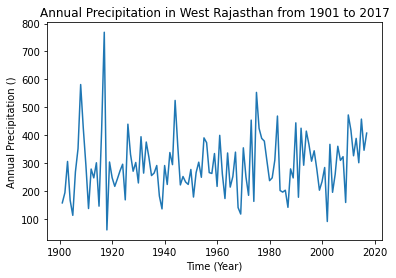

In [9]:
fig, ax = plt.subplots()
ax.plot(precip['YEAR'], precip['ANNUAL'])

ax.set_xlabel('Time (Year)')
ax.set_ylabel('Annual Precipitation ()')
ax.set_title('Annual Precipitation in West Rajasthan from 1901 to 2017');

# can see trends of the annual precipitation from 1901 to 2017

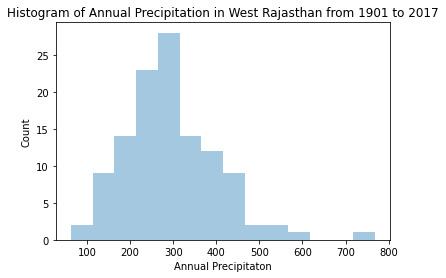

In [10]:
# histogram of annual precipitation
# visualization with matplotlib

sns.distplot(precip['ANNUAL'], kde=False)
plt.xlabel("Annual Precipitaton")
plt.ylabel("Count")
plt.title("Histogram of Annual Precipitation in West Rajasthan from 1901 to 2017");

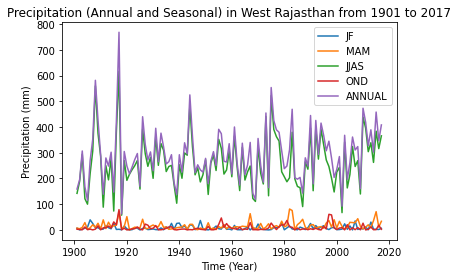

In [11]:
# plot to show precipitation per season and contribution to the annual precipitation
# visualization with matplot lib

fig, ax = plt.subplots()
ax.plot(precip['YEAR'], precip['JF'], label = 'JF')
ax.plot(precip['YEAR'], precip['MAM'], label = 'MAM')
ax.plot(precip['YEAR'], precip['JJAS'], label = 'JJAS')
ax.plot(precip['YEAR'], precip['OND'], label = 'OND')
ax.plot(precip['YEAR'], precip['ANNUAL'], label = 'ANNUAL')

ax.set_xlabel('Time (Year)')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Precipitation (Annual and Seasonal) in West Rajasthan from 1901 to 2017')
ax.legend();

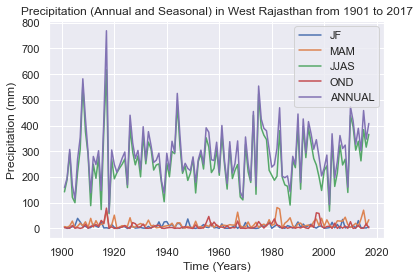

In [12]:
# plot to show precipitation per season and contribution to annual precipitaiton
sns.set()

plt.plot(precip['YEAR'], precip['JF'], label='JF')
plt.plot(precip['YEAR'], precip['MAM'], label='MAM')
plt.plot(precip['YEAR'], precip['JJAS'], label='JJAS')
plt.plot(precip['YEAR'], precip['OND'], label='OND')
plt.plot(precip['YEAR'], precip['ANNUAL'], label='ANNUAL')

plt.legend()
plt.xlabel("Time (Years)")
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation (Annual and Seasonal) in West Rajasthan from 1901 to 2017');

## Precipitation Anomaly Data 

In [13]:
# Make a new dataframe with an index for each month
# first create the date range
date_rng = pd.date_range(start='1/1/1901', end='1/1/2018', freq='M')

type(date_rng[0])
### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# then, create the empty DataFrame, which we will populate using the raw data
p = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
p['Avg_Anomaly_mm'] = None

# Set the index of the DataFrame to the date column (DateTime index)
p.set_index('date', inplace=True)

# Show the first few elements
p.head()

# using the last day of each month for the indexes bc we only care about the month

,Avg_Anomaly_mm
date,
1901-01-31,None
1901-02-28,None
1901-03-31,None
1901-04-30,None
1901-05-31,None


In [15]:
precip = precip.iloc[3, 15]
precip.head()

AttributeError: 'numpy.float64' object has no attribute 'iloc'